In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('used_cars.csv')

# Check QR computation of least squares β & Time the QR decomposition

In [3]:
# extract features and target variable
X = df[['mileage', 'year']].values
Y = df['price'].values

# add column of ones for intercept term
X = np.column_stack([np.ones(len(X)), X])

# compute QR decomposition of X
start = time.time()
Q, R = np.linalg.qr(X)
end = time.time()

print(f"Time: {end-start:.4f} seconds")

# solve the least squares problem using back-substitution
coef = np.linalg.solve(R, Q.T @ Y)

print(coef)

# compare with sklearn.linear_model.LinearRegression
reg = LinearRegression().fit(X, Y)
print(reg.coef_)

Time: 0.0008 seconds
[-5.36548987e+06 -1.53721903e-01  2.69434954e+03]
[ 0.00000000e+00 -1.53721903e-01  2.69434954e+03]


# Othogonal Projections

In [4]:
# extract features and target variable
X = df[['mileage', 'year']]
Y = df['price']

# add column of ones for intercept term
X = sm.add_constant(X)

# R1: regress y on [1,mileage]
R1 = sm.OLS(Y, X[['const', 'mileage']]).fit()
print(R1.summary())

# R2: regress y on [1,mileage,year]
R2 = sm.OLS(Y, X).fit()
print(R2.summary())

# R3: regress mileage on [1,year]
R3 = sm.OLS(X['mileage'], X[['const', 'year']]).fit()
print(R3.summary())

# R4: regress y on the residuals from the regression R3
residuals = X['mileage'] - R3.predict(X[['const', 'year']])
R4 = sm.OLS(Y, sm.add_constant(residuals)).fit()
print(R4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1978.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.37e-239
Time:                        00:21:13   Log-Likelihood:                -10693.
No. Observations:                1000   AIC:                         2.139e+04
Df Residuals:                     998   BIC:                         2.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.636e+04    670.626     84.041      0.0

In [5]:
# compute correlation matrix of residuals and columns of X
np.corrcoef(np.column_stack([residuals, X['mileage'], X['year']]).T)

array([[ 1.00000000e+00,  6.67366756e-01,  4.16985868e-15],
       [ 6.67366756e-01,  1.00000000e+00, -7.44729221e-01],
       [ 4.16985868e-15, -7.44729221e-01,  1.00000000e+00]])

# Properties of the Multivariate Normal

## (a)

In [6]:
p = 5
rho = 0.8
Sigma = np.full((p, p), rho)
np.fill_diagonal(Sigma, 1.0)

marginal_cov = Sigma[:2, :2]
print("Marginal covariance matrix of (Y1, Y2):")
print(marginal_cov)

Marginal covariance matrix of (Y1, Y2):
[[1.  0.8]
 [0.8 1. ]]


## (b)

In [7]:
# Conditional mean vector
mu_cond = np.array([rho * 0.23 / 0.8, rho * (-0.65) / 0.8])

# Conditional covariance matrix
S_cond = marginal_cov - Sigma[0:2, 2:5].dot(np.linalg.inv(Sigma[2:5, 2:5])).dot(Sigma[2:5, 0:2])

print("Conditional mean vector of (Y1, Y2):")
print(mu_cond)

print("Conditional covariance matrix of (Y1, Y2):")
print(S_cond)

Conditional mean vector of (Y1, Y2):
[ 0.23 -0.65]
Conditional covariance matrix of (Y1, Y2):
[[0.26153846 0.06153846]
 [0.06153846 0.26153846]]


## (c)

In [9]:
L = np.linalg.cholesky(Sigma)
print("Lower triangular matrix L from Cholesky decomposition:")
print(L)

Lower triangular matrix L from Cholesky decomposition:
[[1.         0.         0.         0.         0.        ]
 [0.8        0.6        0.         0.         0.        ]
 [0.8        0.26666667 0.53748385 0.         0.        ]
 [0.8        0.26666667 0.16537965 0.51140831 0.        ]
 [0.8        0.26666667 0.16537965 0.12033137 0.49705012]]


## (d)

In [10]:
L_inv = np.linalg.inv(L)
print("Inverse of the lower triangular matrix L:")
print(L_inv)

Inverse of the lower triangular matrix L:
[[ 1.          0.          0.          0.          0.        ]
 [-1.33333333  1.66666667  0.          0.          0.        ]
 [-0.82689823 -0.82689823  1.86052102  0.          0.        ]
 [-0.60165684 -0.60165684 -0.60165684  1.95538472  0.        ]
 [-0.47338107 -0.47338107 -0.47338107 -0.47338107  2.01186954]]


## (e)

In [11]:
p = 5
rho = 0.8
Sigma = np.full((p, p), rho)
np.fill_diagonal(Sigma, 1.0)

# (e) Compute A
D, V = np.linalg.eigh(Sigma)
A = V @ np.diag(np.sqrt(D))
print("A = ")
print(A)

A = 
[[ 3.27545381e-01  0.00000000e+00  0.00000000e+00 -2.29595346e-01
   9.16515139e-01]
 [-3.04191084e-01 -5.58570184e-17  0.00000000e+00 -2.59745615e-01
   9.16515139e-01]
 [-7.78476596e-03  3.65148372e-01  0.00000000e+00  1.63113654e-01
   9.16515139e-01]
 [-7.78476596e-03 -1.82574186e-01 -3.16227766e-01  1.63113654e-01
   9.16515139e-01]
 [-7.78476596e-03 -1.82574186e-01  3.16227766e-01  1.63113654e-01
   9.16515139e-01]]


## (f)

In [12]:
n = 10000
samples = np.random.multivariate_normal(np.zeros(p), Sigma, size=n)
mu_hat = np.mean(samples, axis=0)
Sigma_hat = np.cov(samples.T)
print("mu_hat = ")
print(mu_hat)
print("Sigma_hat = ")
print(Sigma_hat)

mu_hat = 
[ 0.01215241  0.00890614 -0.00222814  0.01230498  0.00778325]
Sigma_hat = 
[[0.99201361 0.79704652 0.79264147 0.79225653 0.79025751]
 [0.79704652 0.99630463 0.80003433 0.79823296 0.79318922]
 [0.79264147 0.80003433 1.00009226 0.79775525 0.79079905]
 [0.79225653 0.79823296 0.79775525 0.99165034 0.78752125]
 [0.79025751 0.79318922 0.79079905 0.78752125 0.98387105]]


## (g)

In [13]:
n = 50
samples = np.random.multivariate_normal(np.zeros(p), Sigma, size=n)
mu_hat = np.mean(samples, axis=0)
Sigma_hat = np.cov(samples.T)
print("mu_hat = ")
print(mu_hat)
print("Sigma_hat = ")
print(Sigma_hat)

mu_hat = 
[-0.13612     0.0349271  -0.01476973 -0.01785314 -0.1001787 ]
Sigma_hat = 
[[0.89235354 0.65766634 0.67652004 0.64022037 0.61946546]
 [0.65766634 0.91917726 0.66221576 0.60157022 0.59198129]
 [0.67652004 0.66221576 0.81140135 0.63320545 0.576226  ]
 [0.64022037 0.60157022 0.63320545 0.7078016  0.55044263]
 [0.61946546 0.59198129 0.576226   0.55044263 0.83929357]]


# Multivariate Normal Likelihood

In [14]:
from scipy.stats import multivariate_normal

def log_likelihood(Y, mu, Sigma):
    n, p = Y.shape
    dS = np.linalg.det(Sigma)
    Si = np.linalg.inv(Sigma)
    Yc = Y - mu
    retval = -0.5 * n * np.log(dS) - 0.5 * np.sum(np.matmul(np.matmul(Yc, Si), Yc.T))
    return retval

# Simulate data
np.random.seed(123)
n = 1000
p = 2
rho = 0.8
Sigma = np.full((p, p), rho)
np.fill_diagonal(Sigma, 1.0)
mu = np.zeros(p)
Y = np.random.multivariate_normal(mu, Sigma, n)

# Compute MLE
mu_mle = np.mean(Y, axis=0)
Sigma_mle = np.cov(Y, rowvar=False)

# Check log likelihood at MLE
print(log_likelihood(Y, mu_mle, Sigma_mle))

# Check log likelihood using vectorized code
dS = np.linalg.det(Sigma_mle)
Si = np.linalg.inv(Sigma_mle)
Yc = Y - mu_mle
retval_vec = -0.5 * n * np.log(dS) - 0.5 * np.sum(np.matmul(np.matmul(Yc, Si), Yc.T))
print(retval_vec)

# Plot log likelihood for each parameter
mu1_vals = np.linspace(mu_mle[0] - 0.5, mu_mle[0] + 0.5, 100)
mu2_vals = np.linspace(mu_mle[1] - 0.5, mu_mle[1] + 0.5, 100)
sigma11_vals = np.linspace(Sigma_mle[0, 0] - 0.5, Sigma_mle[0, 0] + 0.5, 100)
sigma12_vals = np.linspace(Sigma_mle[0, 1] - 0.5, Sigma_mle[0, 1] + 0.5, 100)
sigma22_vals = np.linspace(Sigma_mle[1, 1] - 0.5, Sigma_mle[1, 1] + 0.5, 100)

loglik_mu1 = [log_likelihood(Y, [mu1, mu_mle[1]], Sigma_mle) for mu1 in mu1_vals]
loglik_mu2 = [log_likelihood(Y, [mu_mle[0], mu2], Sigma_mle) for mu2 in mu2_vals]
loglik_sigma11 = [log_likelihood(Y, mu_mle, [[sigma11, Sigma_mle[0, 1]], [Sigma_mle[1, 0], Sigma_mle[1, 1]]]) for sigma11 in sigma11_vals]
loglik_sigma12 = [log_likelihood(Y, mu_mle, [[Sigma_mle[0, 0], sigma12], [Sigma_mle[1, 0], Sigma_mle[1, 1]]]) for sigma12 in sigma12_vals]
loglik_sigma22 = [log_likelihood(Y, mu_mle, [[Sigma_mle[0, 0], Sigma_mle[0, 1]], [Sigma_mle[1, 0], sigma22]]) for sigma22 in sigma22_vals]


550.7536039487462
550.7536039487462


/var/folders/jv/57f83l2x4cx_n26b4xzvfz_m0000gn/T/ipykernel_19354/1573729343.py:8: RuntimeWarning: invalid value encountered in log
  retval = -0.5 * n * np.log(dS) - 0.5 * np.sum(np.matmul(np.matmul(Yc, Si), Yc.T))


# Basic Gaussian Process Regression

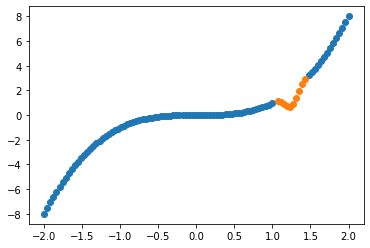

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and f(x)
x = np.linspace(-2, 2, 100)
fx = x ** 3

# Define indices for observed and unobserved points
observed_indices = list(range(75)) + list(range(86, 100))
unobserved_indices = list(range(76, 86))

# Extract observed and unobserved values of f(x)
observed_fx = fx[observed_indices]

# Define hyperparameters for kernel function
sigma_f = 0.1
l = 0.1

# Compute covariance matrix using squared exponential kernel
diffs = x.reshape(-1, 1) - x.reshape(1, -1)
Sigma = (sigma_f ** 2) * np.exp(-(diffs ** 2) / (2 * l ** 2))

# Extract submatrices of covariance matrix for observed and unobserved points
sig_xx = Sigma[observed_indices, :][:, observed_indices]
sig_yy = Sigma[unobserved_indices, :][:, unobserved_indices]
sig_xy = Sigma[observed_indices, :][:, unobserved_indices]
sig_yx = np.transpose(sig_xy)

# Compute mean and covariance of unobserved points given observed points
mu_y = sig_yx @ np.linalg.inv(sig_xx) @ observed_fx
sig_y = sig_yy - sig_yx @ np.linalg.inv(sig_xx) @ sig_xy

# Generate samples from the distribution of unobserved points
samples = np.random.multivariate_normal(mu_y, sig_y, size=1000)

# Compute mean of samples
y = np.mean(samples, axis=0)

# Plot observed and unobserved points
plt.scatter(x[observed_indices], observed_fx)
plt.scatter(x[unobserved_indices], y)
plt.show()